### Telecom Customer Churn  
#### Analysis

#### Tomic Ahmed

This dataset contains information about Telco customers and if they did churn in the last month. Each row represents a unique costumer, while each column contains customer’s attributes as gender, dependents, monthly charges... We will be using Python and Seaborn library to plot and analyze the data.

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.

import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
data=pd.read_csv('/home/ahmed/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Overview data

In [3]:

data.columns.tolist()



['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [4]:
data.isnull().sum().values.sum()

0

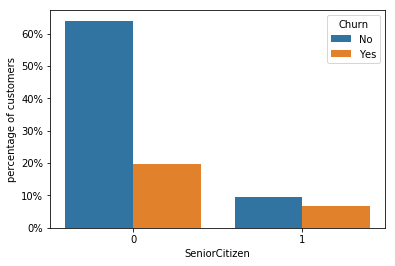

In [5]:
def barplot_percentages(feature, orient='v', axis_name = "percentage of customers"):
    ratios = pd.DataFrame()
    g = data.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(data)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")


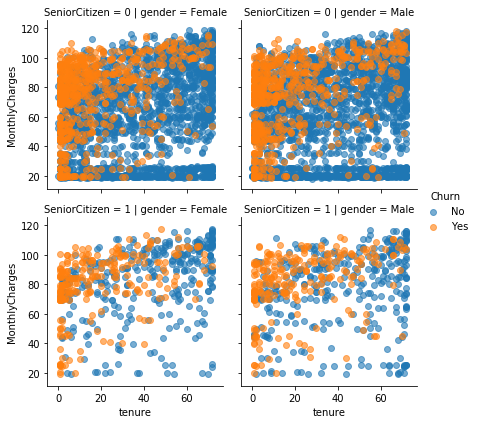

In [6]:
g = sns.FacetGrid(data, row='SeniorCitizen', col="gender", hue="Churn")
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();


### Gender is not an indicative of churn. SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior  customers.There are no special relations between this categorical values and the main numerical features.



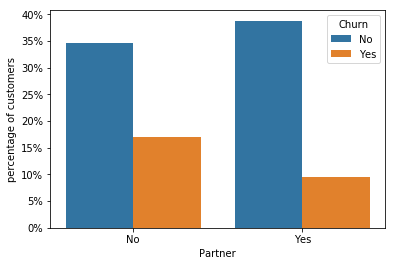

In [7]:
barplot_percentages("Partner")

###  Customers that doesn't have partners are more likely to churn

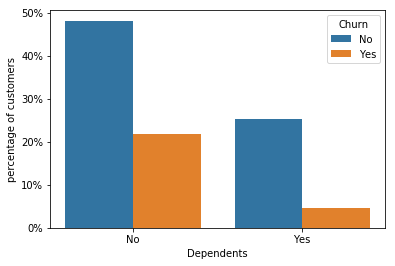

In [8]:
barplot_percentages("Dependents")

### Customers without dependents are also more likely to churn

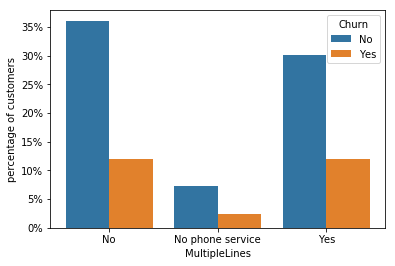

In [9]:
barplot_percentages("MultipleLines")

### Customers with multiple lines are more likely to churn

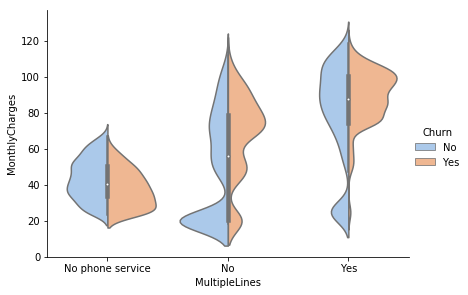

In [10]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=data, height=4.2, aspect=1.4)


### Multiple lines affects on monthly charges

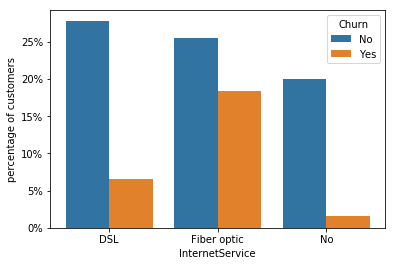

In [11]:
barplot_percentages("InternetService")

### Clients without internet have a very low churn rate. Customers with fiber are more probable to churn than those with DSL connection

    

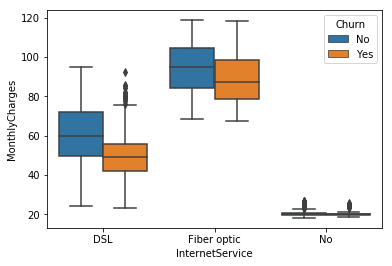

In [12]:
ax = sns.boxplot(x="InternetService", y="MonthlyCharges", hue="Churn",
                   data=data);


###  It's interesting how customers with DSL (slower connection) and higher charges are less probable to churn

### Contract and Payment


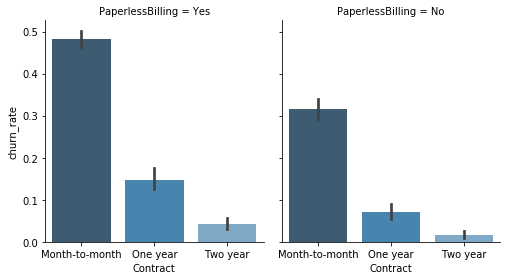

In [13]:
data['churn_rate'] = data['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(data, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])


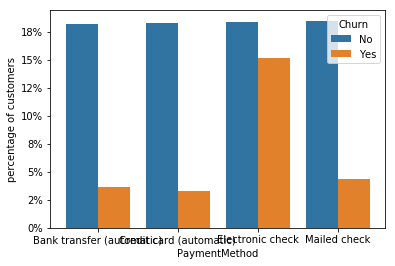

In [14]:

barplot_percentages("PaymentMethod")

### Customers with paperless billing are more probable to churn.The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate. Short term contracts have higher churn rates


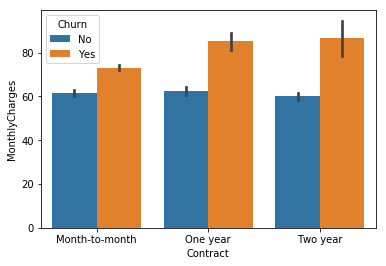

In [15]:
ax = sns.barplot(x="Contract", y="MonthlyCharges", hue="Churn", data=data )

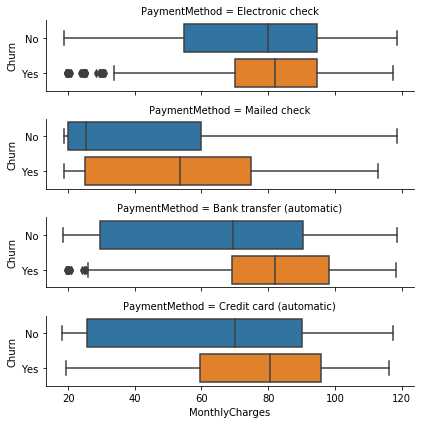

In [16]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=data, height=1.5, aspect=4, orient='h')


### Longer contracts are more affected by higher monthly charges (for churn rate).Mailed checks have lower charges.There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check



## Summary

Three numerical features are good predictors for churn, specially tenure. As we've seen, customers with Fiber optic are very likely to churn, while those with long term contracts are not. On the other hand, gender and streaming are not important features and It might be interesting to drop additional services with the label 'No internet service', since they are highly correlated.